<a href="https://colab.research.google.com/github/reedethc/Prediction-of-Product-Sales/blob/main/Copy_of_Copy_of_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Prediction of Product Sales
- Author: Red Mataragkas
---
## "Project Overview"
- The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.
---


## "Load and Inspect Data"
---


In [1]:
#Insert code below the heading "Loading Data"
#Use Pandas to read the sales prediction data set into Google Colab.
#Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
# import the required packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

# Save the filepath and load the data as "df_titanic"
fname = '/content/drive/MyDrive/Coding Dojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)


In [3]:
#inspect first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#inspect last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


## "Clean Data"
---


Insert code below the heading "Data Cleaning"

Explore the data - what do you need to do to clean this data? Clean it!
Be sure to address each of the following tasks:

1) How many rows and columns?
- there are 8523 rows and 12 columns in this dataset

In [5]:
#Determine how many rows and columns
df.shape

(8523, 12)


2) What are the datatypes of each variable?


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



3) Are there duplicates? If so, drop any duplicates.


In [7]:
dup_rows = df.duplicated()
dup_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
#Drop any duplicates
df.duplicated().sum()

0

In [9]:
df[dup_rows]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [10]:
df.duplicated(subset=['Item_Identifier'], keep=False).sum()

8514


4) Identify missing values.



In [11]:
null_sums= df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight and Outlet_Size have missing values

In [12]:
df['Item_Identifier'].nunique()/len(df)*100

18.291681332864016

5) Address the missing values by using a placeholder value.


In [13]:
df['Item_Weight']=df['Item_Weight'].fillna(0)

In [14]:
df['Outlet_Size']=df['Outlet_Size'].fillna("MISSING")


6) Confirm that there are no missing values after addressing them.


In [15]:
null_sums= df.isna().sum()
null_sums

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).


In [16]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':"Low Fat",'reg':"Regular"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Exploratory Data Anaylsis
___



8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [17]:
num_cols=df.select_dtypes("number").columns
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.650590,0.066132,140.992782,1997.831867,2181.288914
std,6.431899,0.051598,62.275067,8.371760,1706.499616
min,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Feature Inspection
___


Your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.


Start updating the README file associated with the project.

- Add text describing the project.
- Select two key visuals of different types that demonstrate a relevant insight into the data.
- Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

Histograms - distribution of numerical columns

In [22]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

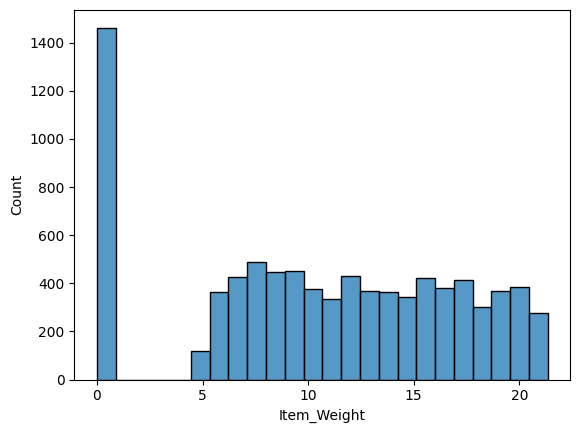

In [30]:
#Item Weight
ax = sns.histplot(data=df, x="Item_Weight")
ax.ticklabel_format(style='plain');


The data shows that apart from the observations with missing values (0), the item weight is similar in count except for weight between 4 and 6

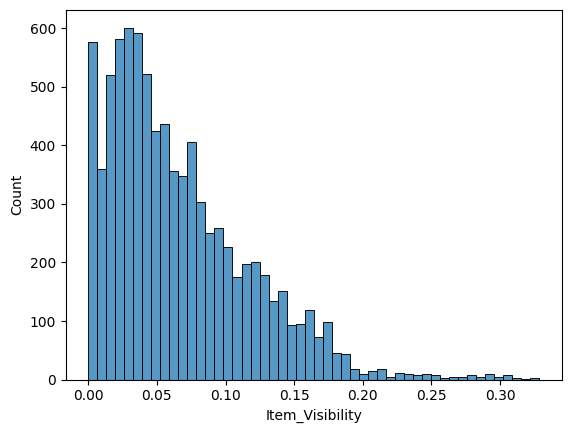

In [31]:
#Item_Visibility
ax = sns.histplot(data=df, x="Item_Visibility")
ax.ticklabel_format(style='plain');


As the item visibility increases the count of obs decreases

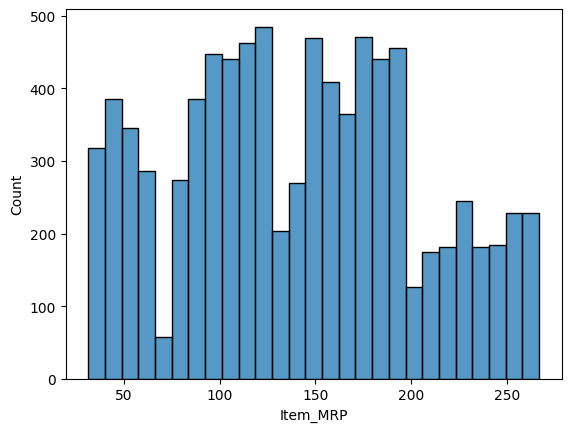

In [32]:
#Item_MRP
ax = sns.histplot(data=df, x="Item_MRP")
ax.ticklabel_format(style='plain');


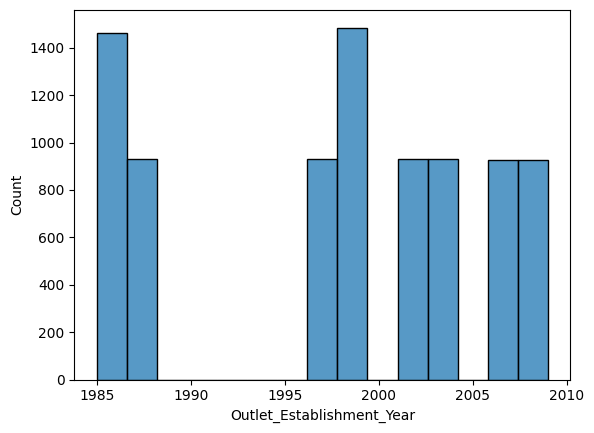

In [33]:
#Outlet_Establishment_Year
ax = sns.histplot(data=df, x="Outlet_Establishment_Year")
ax.ticklabel_format(style='plain');


There is no obs with outlet establishment year just before 1990 and a bit after 1995. 1986 and 1998 have high counts while the others are around 900 obs.

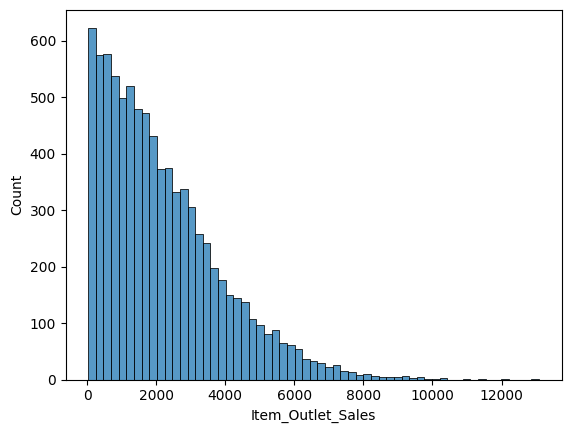

In [34]:
#Item_Outlet_Sales
ax = sns.histplot(data=df, x="Item_Outlet_Sales")
ax.ticklabel_format(style='plain');


Outlet sales decrease gradually as the count decreases.

Boxplots- Statistical summaries of numercial columns

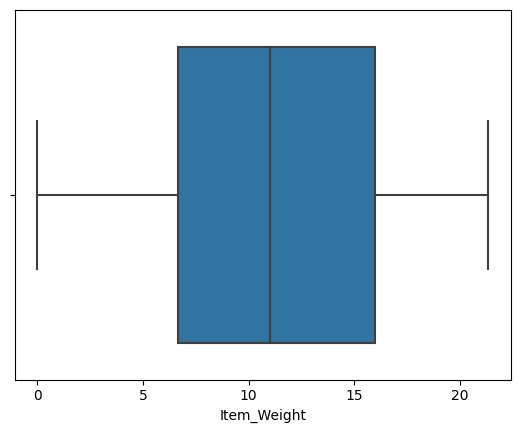

In [35]:
ax = sns.boxplot(data=df, x="Item_Weight")

Item weight median is around 11 with minimum value 0 and max value of around 22

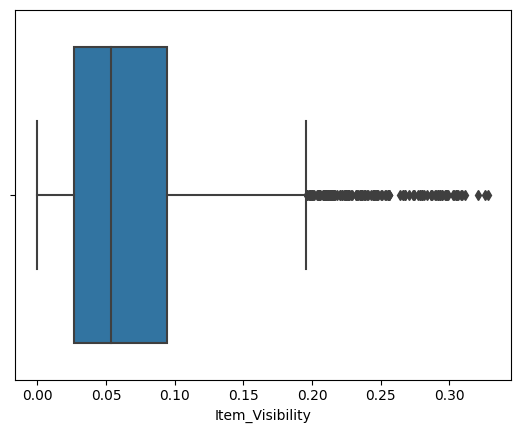

In [36]:
ax = sns.boxplot(data=df, x="Item_Visibility")

visibility median is around 0.05 with many outliers with visibility more than 0.20

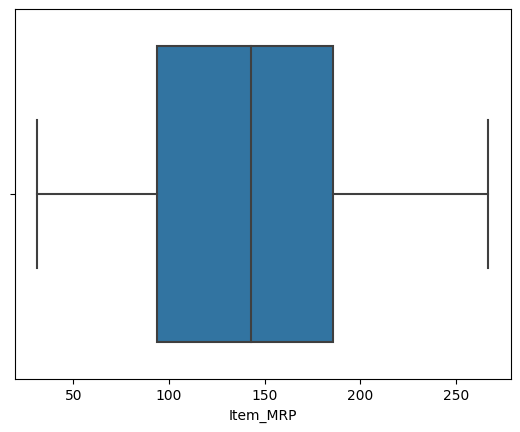

In [38]:
ax = sns.boxplot(data=df, x="Item_MRP")

Item MRP median is just below 150 with no outliers

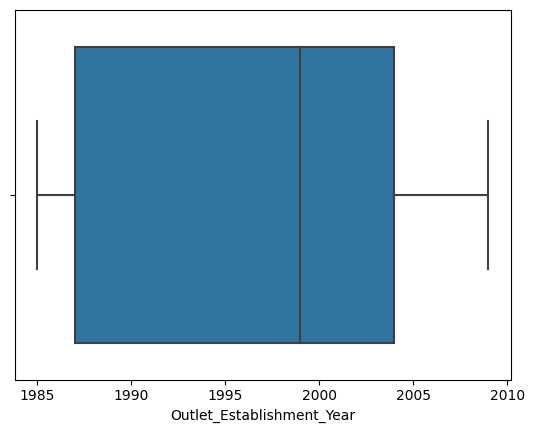

In [39]:
ax = sns.boxplot(data=df, x="Outlet_Establishment_Year")

Outlet establishment year median is around 1999, with a min of 1985 and max of 2009

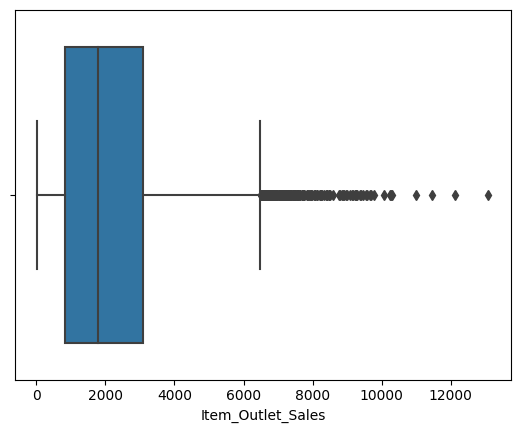

In [40]:
ax = sns.boxplot(data=df, x="Item_Outlet_Sales")

Outlet sales median is just below 2000 with many outliers after 6000

Countplots - view the frequency of each class of categorial features

In [41]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

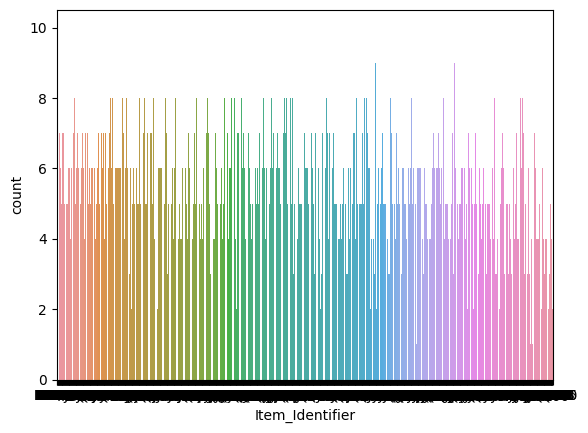

In [42]:
ax = sns.countplot(data=df, x="Item_Identifier")

obs count varies between o to 9 for each item identifier

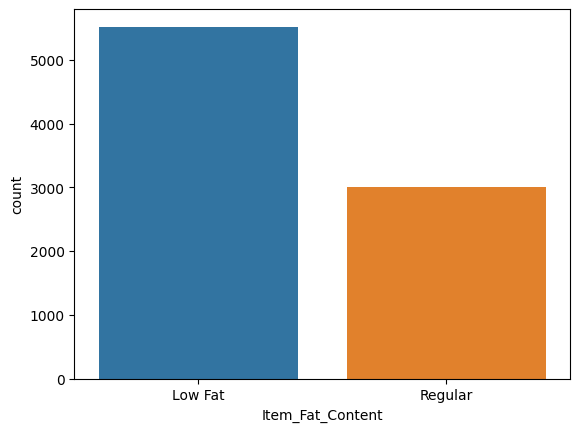

In [43]:
ax = sns.countplot(data=df, x="Item_Fat_Content")

low fat content items have a higher count than regular fat content items

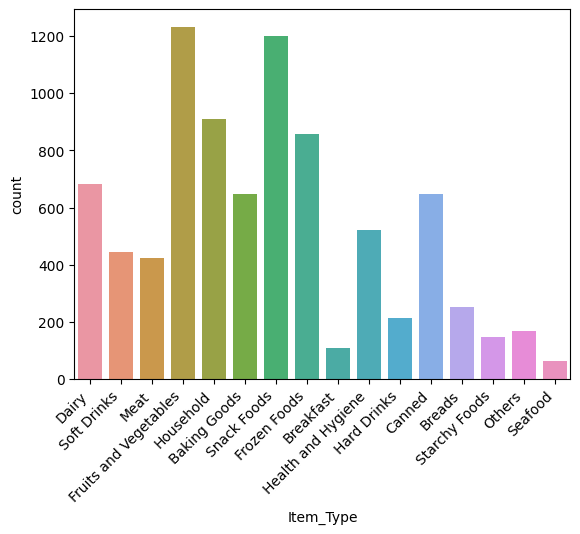

In [49]:
ax = sns.countplot(data=df, x="Item_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

Fruits and Vegetables and snack foods have the highest count in the dataset while breakfast and seafood have the lowest

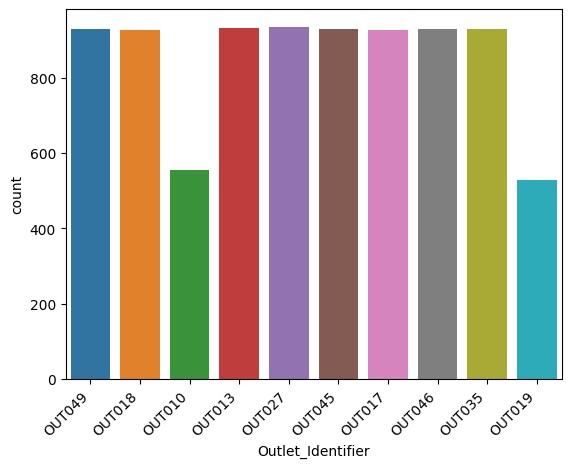

In [50]:
ax = sns.countplot(data=df, x="Outlet_Identifier")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

All outlets have the same obs count except for OUT010 and OUT019

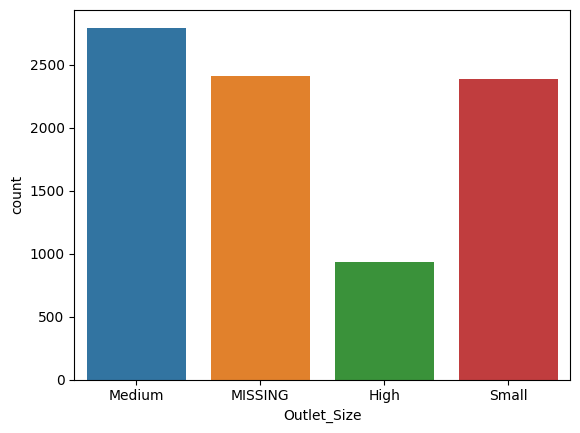

In [46]:
ax = sns.countplot(data=df, x="Outlet_Size")

Medium outlet size has the highest count while missing and small have more or less the same count with high outlet size as the lowest count.

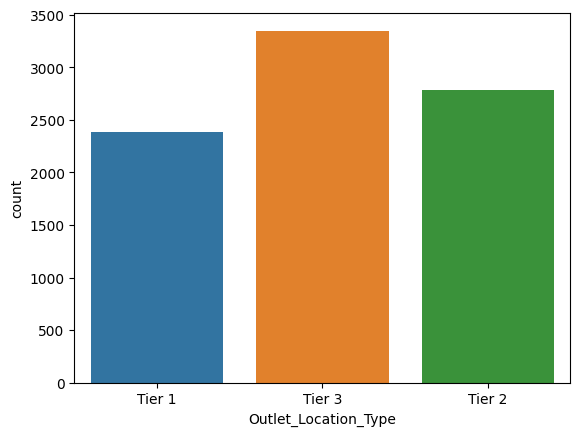

In [47]:
ax = sns.countplot(data=df, x="Outlet_Location_Type")

Tier 3 location has the highest count followed by Tier 2 with Tier 1 as the lowest count

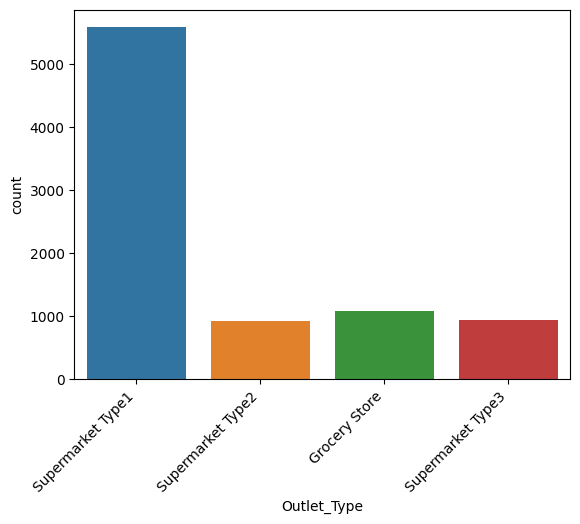

In [51]:
ax = sns.countplot(data=df, x="Outlet_Type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

Supermarket Type 1 has the highest count of obs with the remaining 3 tyypes having more or less the same count.

Heatmap - correlation between features

In [19]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.52,-0.05
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.52,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.05,-0.13,0.57,-0.05,1.00


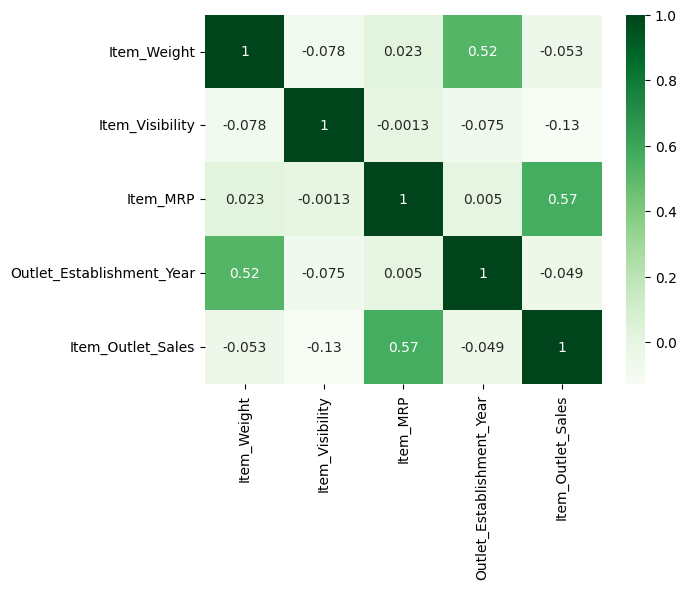

In [20]:
sns.heatmap(corr, cmap = 'Greens', annot = True);

Outlet establishment year has a medium positive correlation to item weight.
Item Outlet Sales also has a medium positive correlation to item MRP.